In [1]:
import pandas as pd
import numpy as np
from multiprocessing import Pool, cpu_count
from functools import partial
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper", font_scale=1.5)
sns.set_style('ticks')
from matplotlib.ticker import ScalarFormatter

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
frag_full_all_aa = pd.read_pickle('results/frag_and_full_len_all_aa_no_indels_.pkl.gz')
full_len_reduced_aa = pd.read_pickle('results/full_length_reduced_AA_no_indels.pkl.gz')
frag_100_AA_reduced_aa = pd.read_pickle('results/100_AA_frag_reduced_AA_no_indels.pkl.gz')
frag_50_AA_reduced_aa = pd.read_pickle('results/50_AA_frag_reduced_AA_no_indels.pkl.gz')

#### Effect of posterior

In [4]:
frag_full_all_aa.head(2)

,known aa,max_prob,total queries,hits,identified,identified_frac,Type,fragment#
0,ACDEFGHIKLMNPQRSTVWY,0.9,20181,20178,19985,0.990288,Full length,NaN
1,ACDEFGHIKLMNPQRSTVWY,0.8,20181,20179,19983,0.990189,Full length,NaN


In [4]:
frag_full_all_aa[frag_full_all_aa.Type == 'Full length']

,known aa,max_prob,total queries,hits,identified,identified_frac,Type,fragment#
0,ACDEFGHIKLMNPQRSTVWY,0.90,20181,20178,19985,0.990288,Full length,NaN
1,ACDEFGHIKLMNPQRSTVWY,0.80,20181,20179,19983,0.990189,Full length,NaN
2,ACDEFGHIKLMNPQRSTVWY,0.60,20181,20179,19937,0.987909,Full length,NaN
3,ACDEFGHIKLMNPQRSTVWY,0.40,20181,20178,19879,0.985035,Full length,NaN
4,ACDEFGHIKLMNPQRSTVWY,0.20,20181,20180,19858,0.983995,Full length,NaN
5,ACDEFGHIKLMNPQRSTVWY,0.30,20181,20178,19868,0.98449,Full length,NaN
6,ACDEFGHIKLMNPQRSTVWY,0.10,20181,20125,19930,0.987563,Full length,NaN
7,ACDEFGHIKLMNPQRSTVWY,0.09,20181,20095,19858,0.983995,Full length,NaN
8,ACDEFGHIKLMNPQRSTVWY,0.08,20181,20107,19373,0.959962,Full length,NaN
9,ACDEFGHIKLMNPQRSTVWY,0.07,20181,20137,14911,0.738863,Full length,NaN


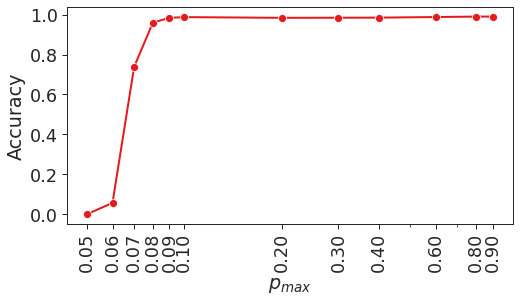

In [5]:
sns.set_context("paper", font_scale=2)
sns.set_style('ticks')
plt.figure(figsize=(8, 4))
ax = sns.lineplot(data=frag_full_all_aa[frag_full_all_aa.Type == 'Full length'], \
                     x='max_prob', y='identified_frac', hue='Type', \
                  palette="Set1", marker='o', markersize=8, lw=2, legend=None)
ax.set_xscale('log')
ax.set_xticks(frag_full_all_aa['max_prob'].value_counts().index, )
ax.tick_params(axis='x', rotation=90)
ax.get_xaxis().set_major_formatter(ScalarFormatter())
ax.set_xlabel(r'${p_{max}}$')
ax.set_ylabel('Accuracy')
plt.savefig('figs/fig1-logscale.pdf', bbox_inches='tight');

In [6]:
frag_full_all_aa[frag_full_all_aa.Type == 'Full length']

,known aa,max_prob,total queries,hits,identified,identified_frac,Type,fragment#
0,ACDEFGHIKLMNPQRSTVWY,0.90,20181,20178,19985,0.990288,Full length,NaN
1,ACDEFGHIKLMNPQRSTVWY,0.80,20181,20179,19983,0.990189,Full length,NaN
2,ACDEFGHIKLMNPQRSTVWY,0.60,20181,20179,19937,0.987909,Full length,NaN
3,ACDEFGHIKLMNPQRSTVWY,0.40,20181,20178,19879,0.985035,Full length,NaN
4,ACDEFGHIKLMNPQRSTVWY,0.20,20181,20180,19858,0.983995,Full length,NaN
5,ACDEFGHIKLMNPQRSTVWY,0.30,20181,20178,19868,0.98449,Full length,NaN
6,ACDEFGHIKLMNPQRSTVWY,0.10,20181,20125,19930,0.987563,Full length,NaN
7,ACDEFGHIKLMNPQRSTVWY,0.09,20181,20095,19858,0.983995,Full length,NaN
8,ACDEFGHIKLMNPQRSTVWY,0.08,20181,20107,19373,0.959962,Full length,NaN
9,ACDEFGHIKLMNPQRSTVWY,0.07,20181,20137,14911,0.738863,Full length,NaN


#### Effect of sequence length 


## See file combined_result_from_10_fragments.ipynb

#### Supplementary fig
Number of times each sequence is identifed from 10 fragments

In [5]:
times_df = pd.read_pickle('results/all_times_identified_from_10_frag.pkl.gz')

In [6]:
times_df = times_df.rename(columns={'Posterior': 'p_max'})

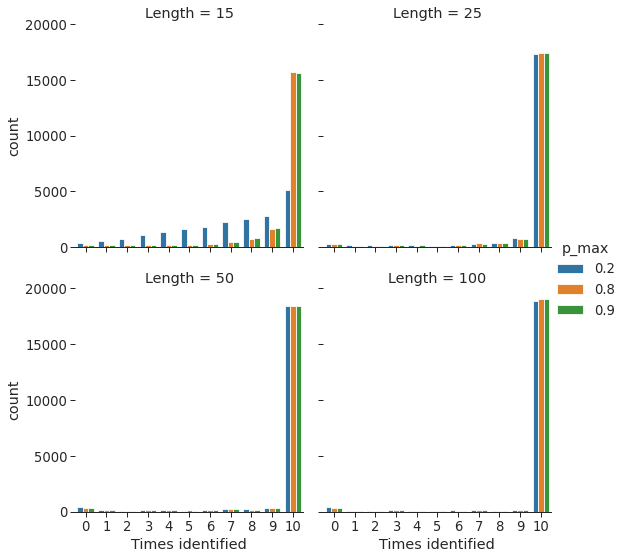

In [7]:


# times_df.head(2)
posts = [0.9, 0.8, 0.2]
temp_df = times_df[times_df.p_max.apply(lambda x: x in posts)].copy()
g = sns.catplot(
    data=temp_df[temp_df.Length.apply(lambda x: x in [15, 25, 50, 100])], 
    hue='p_max', x='Times identified', col="Length",
    height=4, aspect=1,
    kind='count',  col_wrap=2, 
    hue_order=posts[::-1]
)

g.despine(left=True);

#### Effect of reduced AA

- posteriors to use = [0.8, 0.2]
- length to use = [full, 100, 50]

In [18]:
full_len_reduced_aa = pd.read_pickle('results/full_length_reduced_AA_no_indels.pkl.gz')
full_len_reduced_aa['Type'] = 'Full length'
frag_100_AA_reduced_aa = pd.read_pickle('results/100_AA_frag_reduced_AA_no_indels.pkl.gz')
frag_100_AA_reduced_aa['Type'] = '100 AA'
frag_50_AA_reduced_aa = pd.read_pickle('results/50_AA_frag_reduced_AA_no_indels.pkl.gz')
frag_50_AA_reduced_aa['Type'] = '50 AA'

In [19]:
reduced_aa = pd.concat([full_len_reduced_aa, frag_100_AA_reduced_aa, frag_50_AA_reduced_aa]).reset_index(drop=True)
reduced_aa

,Reduced AA,Posterior,total queries,hits,identified,fragment#,identified_frac,# Reduced AA,Reduced AA,Type
0,L,0.90,20181,20125,15795,0,0.782667,1,LSEAG,Full length
1,L,0.80,20181,20129,15137,0,0.750062,1,LSEAG,Full length
2,L,0.60,20181,20141,12772,0,0.632873,1,LSEAG,Full length
3,L,0.40,20181,20145,8090,0,0.400872,1,LSEAG,Full length
4,L,0.20,20181,20145,509,0,0.025222,1,LSEAG,Full length
...,...,...,...,...,...,...,...,...,...,...
556,LSEAG,0.09,20181,20036,1,0,0.00005,5,LSEAG,50 AA
557,LSEAG,0.08,20181,20138,0,0,0.0,5,LSEAG,50 AA
558,LSEAG,0.07,20181,20140,1,0,0.00005,5,LSEAG,50 AA
559,LSEAG,0.06,20181,20141,1,0,0.00005,5,LSEAG,50 AA


In [20]:
reduced_aa['Type'].value_counts()

Full length    187
100 AA         187
50 AA          187
Name: Type, dtype: int64

In [21]:
reduced_aa[(reduced_aa['Reduced AA'] == "LSEAG") & (reduced_aa['Type'] == '50 AA') \
          & (reduced_aa['Posterior'] == 0.8)]

,Reduced AA,Posterior,total queries,hits,identified,fragment#,identified_frac,# Reduced AA,Reduced AA,Type
551,LSEAG,0.8,20181,20120,18936,0,0.938308,5,LSEAG,50 AA


/homes/bikash/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 70.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/homes/bikash/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/homes/bikash/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


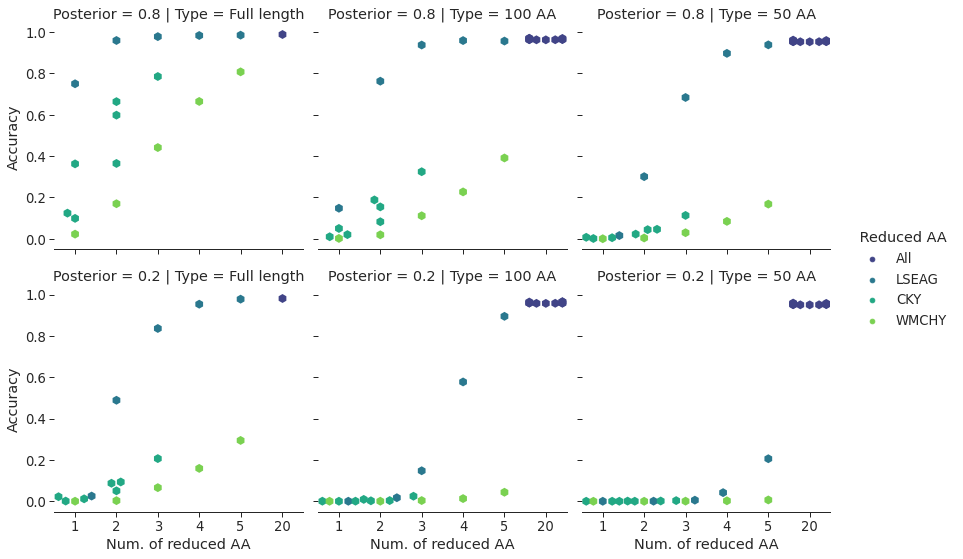

In [23]:
### For n = full length and p = 0.8
sns.set_context("paper", font_scale=1.5)
sns.set_style('ticks')



temp_frag_full_all_aa = frag_full_all_aa.copy()
temp_frag_full_all_aa['# Reduced AA'] = 20
temp_frag_full_all_aa['Reduced AA'] = 'LSEAGPVKRTQDIFNYHCMW'
temp_frag_full_all_aa[' Reduced AA '] = 'All'
temp_frag_full_all_aa = temp_frag_full_all_aa.rename(columns={'max_prob': 'Posterior'})
# temp_frag_full_all_aa.head(5)

temp_df = pd.concat([reduced_aa, temp_frag_full_all_aa]).reset_index(drop=True)
temp_df = temp_df[temp_df['Posterior'].apply(lambda x: x in \
                                                                   [0.8, 0.2])]
temp_df = temp_df[temp_df['Type'].apply(lambda x: x in \
                                       ['Full length', '100 AA', '50 AA'])]
temp_df = temp_df.rename(columns={'identified_frac': 'Accuracy', \
                                 '# Reduced AA': 'Num. of reduced AA'})

g = sns.catplot(
    data=temp_df, \
    x='Num. of reduced AA', y='Accuracy',  row="Posterior", col='Type', hue=' Reduced AA ',
#     capsize=.2, errorbar=("pi", 100), 
#     palette="bright", 
    palette='viridis',
    kind="swarm", height=4, aspect=1, #col_wrap=3,
#     hue_order=[0.9, 0.8, 0.6, 0.4, 0.2, 0.1, 0.09, 0.08, 0.07, 0.06, 0.05], 
    hue_order=['All', 'LSEAG', 'CKY', 'WMCHY'],
#     estimator=None, 
    row_order=[0.8, 0.2],
    marker='h', #'o', 'X', '*', 'h',
#     dodge=False,
    s=80
#     sharex=False,
)
# g.fig.suptitle('Full length')
g.despine(left=True)
g.tight_layout();
# sns.pointplot(data=temp_df[(temp_df['Posterior'] == 0.8) & (temp_df['Type'] == 'Full length')], \
#               x='# Reduced AA', y='identified_frac',  hue=" Reduced AA ", errorbar=None)
# sns.swarmplot(data=temp_df[(temp_df['Posterior'] == 0.8) & (temp_df['Type'] == 'Full length')], \
#               x='# Reduced AA', y='identified_frac',  hue=" Reduced AA ", )
# plt.savefig('figs/reduced_aa_swarmplot_marker_h.pdf', pad_inches=0, bbox_inches='tight');

In [33]:
test = temp_df[temp_df['Reduced AA'] == 'LSEAGPVKRTQDIFNYHCMW']
test[(test['Posterior'] == 0.2 ) & (test['Type'] == '100 AA')]['Accuracy'].mean()

0.9603587532827909

In [11]:
temp_df[(temp_df['Type'] == '100 AA') & (temp_df['Num. of reduced AA'] == 3) & \
       (temp_df['Posterior'] == 0.8) & (temp_df[' Reduced AA '] == 'LSEAG')]\
[['Reduced AA', 'Accuracy']].sort_values(by='Accuracy', ascending=False)

,Reduced AA,Accuracy
276,LSE,0.937515


In [24]:
temp_df[(temp_df['Type'] == '100 AA') & (temp_df['Num. of reduced AA'] == 1) & \
       (temp_df['Posterior'] == 0.8) & (temp_df[' Reduced AA '] == 'CKY')]\
[['Reduced AA', 'Accuracy']].sort_values(by='Accuracy', ascending=False)

,Reduced AA,Accuracy
221,K,0.049998
210,C,0.020267
232,Y,0.00991


In [26]:
temp_df[(temp_df['Type'] == '50 AA') & (temp_df['Num. of reduced AA'] == 2) & \
       (temp_df['Posterior'] == 0.8) & (temp_df[' Reduced AA '] == 'CKY')]\
[['Reduced AA', 'Accuracy']].sort_values(by='Accuracy', ascending=False)

,Reduced AA,Accuracy
430,CK,0.045984
441,KY,0.0442
452,YC,0.022695


In [41]:
temp_df[(temp_df['Type'] == 'Full length') & (temp_df['Num. of reduced AA'] == 2) & \
       (temp_df['Posterior'] == 0.8) & (temp_df[' Reduced AA '] == 'LSEAG')]

,Reduced AA,Posterior,total queries,hits,identified,fragment#,Accuracy,Num. of reduced AA,Reduced AA,Type,known aa
12,LS,0.8,20181,20134,19363,0,0.959467,2,LSEAG,Full length,NaN


In [44]:
temp_df[(temp_df['Type'] == '50 AA') & (temp_df['Num. of reduced AA'] == 5) & \
       (temp_df['Posterior'] == 0.8) & (temp_df[' Reduced AA '] == 'LSEAG')]

,Reduced AA,Posterior,total queries,hits,identified,fragment#,Accuracy,Num. of reduced AA,Reduced AA,Type,known aa
551,LSEAG,0.8,20181,20120,18936,0,0.938308,5,LSEAG,50 AA,NaN


#### Effect of errors

- Full length (All aa, reduced AA), posterior=0.8)

In [35]:
full_length_error = pd.read_pickle('results/heatmap_df_full_length_1_ins_p_0.8.pkl.gz')
full_length_error.head(6)

,insertions,deletions,known aa,total queries,hits,identified,Type,precision
0,0,0,LSEAG,20181,20164,19883,Full length,0.985234
1,0,10,LSEAG,20181,20161,19851,Full length,0.983648
2,0,20,LSEAG,20181,20114,19730,Full length,0.977652
3,0,30,LSEAG,20181,19600,18330,Full length,0.90828
4,0,40,LSEAG,20181,17416,12689,Full length,0.62876
5,0,50,LSEAG,20181,14003,4125,Full length,0.2044


In [36]:
full_length_error['known aa'] = full_length_error['known aa'].apply(lambda x: 'CYK' if x == 'CKY' else x)

/hps/scratch/lsf_tmpdir/hl-codon-49-02/ipykernel_2598885/1385826004.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1])


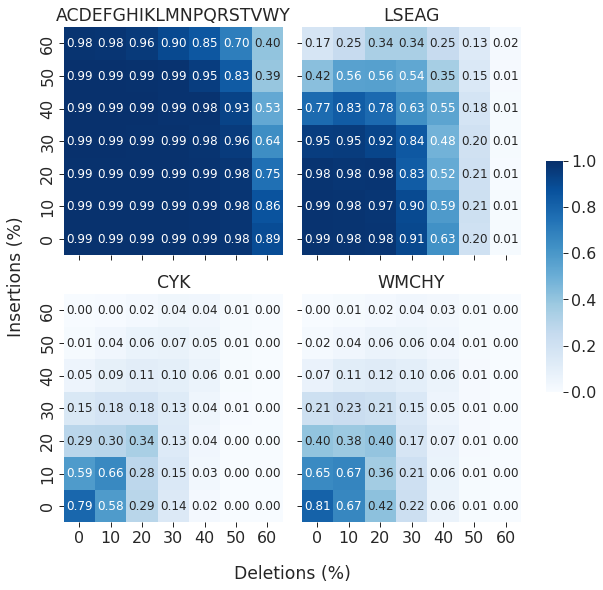

In [39]:
sns.set_context("paper", font_scale=1.8)
sns.set_style('ticks')

data_name = ['Full length']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8),
                          sharex=True, sharey=True)
ax = ax.flatten()
cbar_ax = fig.add_axes([.91, .3, .03, .4])

aa_knowns = ['ACDEFGHIKLMNPQRSTVWY', 'LSEAG', 'CYK', 'WMCHY']
prob_range = [0.8,]
repeats = 1
cols = [0, 10, 20, 30, 40, 50, 60]

for x, y in enumerate(data_name):

    temp_df_ = full_length_error[full_length_error.Type == y].copy()

    for i, v in enumerate(aa_knowns):
        temp_df = temp_df_[temp_df_['known aa'] == v].copy()
        temp1 = pd.DataFrame(columns=cols, index=cols)
        # index = insertions

        for ins in cols:
            for dels in cols:
                try:
                    temp1.loc[ins, dels] = temp_df[(temp_df.insertions == ins) & (temp_df.deletions == dels)]['precision'].item()
                except Exception:
                    pass
        sns.heatmap(temp1.astype(np.float64), cmap='Blues', ax=ax[i],  
                    annot=True, fmt=".2f", cbar=i == 0,
                    vmin=0, vmax=1,
                    cbar_ax=None if i else cbar_ax, annot_kws={"size":12})
        ax[i].invert_yaxis()
    #     ax[i].set_xlabel('Deletions (%)')
    #     ax[i].set_ylabel('Insertions (%)'); 
        ax[i].set_title(v)


#     ax[::-1][0].set_visible(False)
fig.tight_layout(rect=[0, 0, .9, 1])

fig.text(0.47, -0.025, 'Deletions (%)', ha='center')
fig.text(-0.025, 0.5, 'Insertions (%)', va='center', rotation='vertical')
plt.savefig('figs/heatmap_errors.pdf', pad_inches=0, bbox_inches='tight');
plt.show()


In [239]:
full_length_error[(full_length_error['known aa'] == 'WMCHY') & \
                 (full_length_error['deletions'] ==30)]

,insertions,deletions,known aa,total queries,hits,identified,Type,precision
35,0,30,WMCHY,20181,19809,4466,Full length,0.221297
42,10,30,WMCHY,20181,19838,4212,Full length,0.208711


- Fragment 100 AA (All aa, reduced AA), posterior=0.8)

In [171]:
frag_100_length_error = pd.read_pickle('results/heatmap_df_frag_100AA_1_ins_p_0.8.pkl.gz')

In [172]:
frag_100_length_error.head()

,insertions,deletions,known aa,total queries,hits,identified,Type,precision
0,0,0,LSEAG,20181,20164,19313,100 AA fragment,0.956989
1,0,10,LSEAG,20181,20117,19184,100 AA fragment,0.950597
2,0,20,LSEAG,20181,19843,18499,100 AA fragment,0.916654
3,0,30,LSEAG,20181,13372,6749,100 AA fragment,0.334423
4,0,40,LSEAG,20181,11343,4509,100 AA fragment,0.223428


In [173]:
frag_100_length_error['known aa'] = frag_100_length_error['known aa'].apply(lambda x: 'CYK' if x == 'CKY' else x)

/hps/scratch/lsf_tmpdir/hl-codon-121-02/ipykernel_2317554/678164546.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1])


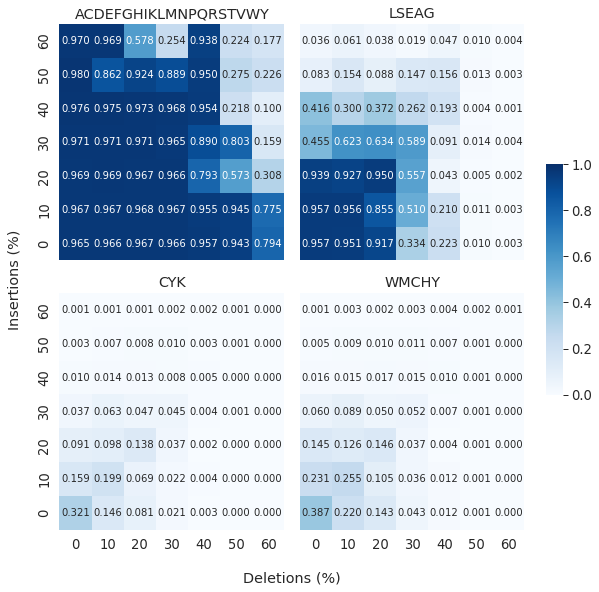

In [174]:
data_name = ['100 AA fragment']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8),
                          sharex=True, sharey=True)
ax = ax.flatten()
cbar_ax = fig.add_axes([.91, .3, .03, .4])

aa_knowns = ['ACDEFGHIKLMNPQRSTVWY', 'LSEAG', 'CYK', 'WMCHY']
prob_range = [0.8,]
repeats = 1
cols = [0, 10, 20, 30, 40, 50, 60]

for x, y in enumerate(data_name):
    
    temp_df_ = frag_100_length_error[frag_100_length_error.Type == y].copy()

    for i, v in enumerate(aa_knowns):
        temp_df = temp_df_[temp_df_['known aa'] == v].copy()
        temp1 = pd.DataFrame(columns=cols, index=cols)
        # index = insertions

        for ins in cols:
            for dels in cols:
                try:
                    temp1.loc[ins, dels] = temp_df[(temp_df.insertions == ins) & (temp_df.deletions == dels)]['precision'].item()
                except Exception as exp:
#                     break
#                     print(str(exp))

                    pass
        sns.heatmap(temp1.astype(np.float64), cmap='Blues', ax=ax[i],  
                    annot=True, fmt=".3f", cbar=i == 0,
                    vmin=0, vmax=1,
                    cbar_ax=None if i else cbar_ax, annot_kws={"size":10})
        ax[i].invert_yaxis()
    #     ax[i].set_xlabel('Deletions (%)')
    #     ax[i].set_ylabel('Insertions (%)'); 
        ax[i].set_title(v)



#     ax[::-1][0].set_visible(False)
fig.tight_layout(rect=[0, 0, .9, 1])

fig.text(0.47, -0.025, 'Deletions (%)', ha='center')
fig.text(-0.025, 0.5, 'Insertions (%)', va='center', rotation='vertical')
plt.show()

- Fragment 50 AA (All aa, reduced AA), posterior=0.8)

In [175]:
frag_50_length_error = pd.read_pickle('results/heatmap_df_frag_50AA_1_ins_p_0.8.pkl.gz')

In [176]:
frag_50_length_error['known aa'] = frag_50_length_error['known aa'].apply(lambda x: 'CYK' if x == 'CKY' else x)

/hps/scratch/lsf_tmpdir/hl-codon-121-02/ipykernel_2317554/1787885674.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1])


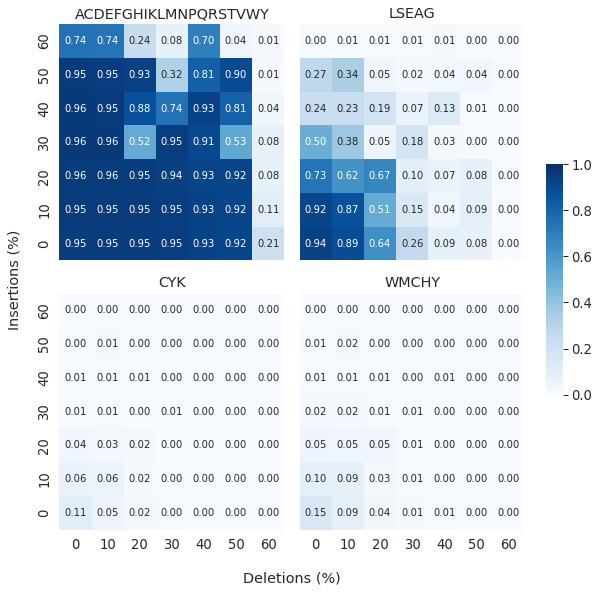

In [177]:
data_name = ['50 AA fragment']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8),
                          sharex=True, sharey=True)
ax = ax.flatten()
cbar_ax = fig.add_axes([.91, .3, .03, .4])

aa_knowns = ['ACDEFGHIKLMNPQRSTVWY', 'LSEAG', 'CYK', 'WMCHY']
prob_range = [0.8,]
repeats = 1
cols = [0, 10, 20, 30, 40, 50, 60]

for x, y in enumerate(data_name):
    
    temp_df_ = frag_50_length_error[frag_50_length_error.Type == y].copy()

    for i, v in enumerate(aa_knowns):
        temp_df = temp_df_[temp_df_['known aa'] == v].copy()
        temp1 = pd.DataFrame(columns=cols, index=cols)
        # index = insertions

        for ins in cols:
            for dels in cols:
                try:
                    temp1.loc[ins, dels] = temp_df[(temp_df.insertions == ins) & (temp_df.deletions == dels)]['precision'].item()
                except Exception:
                    pass
        sns.heatmap(temp1.astype(np.float64), cmap='Blues', ax=ax[i],  
                    annot=True, fmt=".2f", cbar=i == 0,
                    vmin=0, vmax=1,
                    cbar_ax=None if i else cbar_ax, annot_kws={"size":10})
        ax[i].invert_yaxis()
    #     ax[i].set_xlabel('Deletions (%)')
    #     ax[i].set_ylabel('Insertions (%)'); 
        ax[i].set_title(v)


#     ax[::-1][0].set_visible(False)
    fig.tight_layout(rect=[0, 0, .9, 1])
fig.text(0.47, -0.025, 'Deletions (%)', ha='center')
fig.text(-0.025, 0.5, 'Insertions (%)', va='center', rotation='vertical')
plt.show()